Deeper data analysis:
===============

In [16]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

In [21]:
df_clr = pd.read_csv(r"C:\Users\Andrey\Desktop\HIT_UNI\KELIM_NETUNIM\final_project\clr_TI_df.csv")

print(df_clr.head())

                 Name  Primary_attribute  Stat_plus  Stat_minus  \
0             Abaddon                  1          0           2   
1           Alchemist                  1          2           1   
2  Ancient Apparition                  3          1           0   
3           Anti-Mage                  2          1           4   
4          Arc Warden                  2          3           1   

   Abbility_changed  Buffed  Nerfed  Reworked  Other_change  In_TI  
0                21      23      16         0             1      1  
1                44      44      27         0             0      0  
2                26      25       9         0             0      1  
3                15       7      24         0             1      1  
4                37      33      27         3             1      0  


Deleting out liers:
-------
The data set contains all the heroes till this day. Every year around 1/2 new heroes added into the game. Some period new heroes cant be picked in tournament matches. Which mean that thier data can affect the outcome because even if they get changes and updates they cant be played in tournament. The data covers years 2012-2019, and this means the couple last hereos should be removed before machine learning to not affect results.
The last added heroes which will be removed are: Hoodwink, Void Spirit, Snapfire.

In [22]:
rd_df = df_clr.copy()

h1 = df_clr[df_clr.Name == "Hoodwink"].index
h2 = df_clr[df_clr.Name == "Void Spirit"].index
h3 = df_clr[df_clr.Name == "Snapfire"].index

rd_df = df_clr.drop(h1)
rd_df.drop(h2, inplace=True)
rd_df.drop(h3, inplace=True)
print(rd_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 119
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               117 non-null    object
 1   Primary_attribute  117 non-null    int64 
 2   Stat_plus          117 non-null    int64 
 3   Stat_minus         117 non-null    int64 
 4   Abbility_changed   117 non-null    int64 
 5   Buffed             117 non-null    int64 
 6   Nerfed             117 non-null    int64 
 7   Reworked           117 non-null    int64 
 8   Other_change       117 non-null    int64 
 9   In_TI              117 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 10.1+ KB
None


Heat map and correlation between columns:
---

In [23]:
rd_df

,Name,Primary_attribute,Stat_plus,Stat_minus,Abbility_changed,Buffed,Nerfed,Reworked,Other_change,In_TI
0,Abaddon,1,0,2,21,23,16,0,1,1
1,Alchemist,1,2,1,44,44,27,0,0,0
2,Ancient Apparition,3,1,0,26,25,9,0,0,1
3,Anti-Mage,2,1,4,15,7,24,0,1,1
4,Arc Warden,2,3,1,37,33,27,3,1,0
...,...,...,...,...,...,...,...,...,...,...
115,Windranger,3,1,1,26,34,4,0,1,0
116,Winter Wyvern,3,1,1,14,16,16,0,0,0
117,Witch Doctor,3,0,0,5,4,2,0,0,0
118,Wraith King,1,0,3,12,5,24,0,0,0


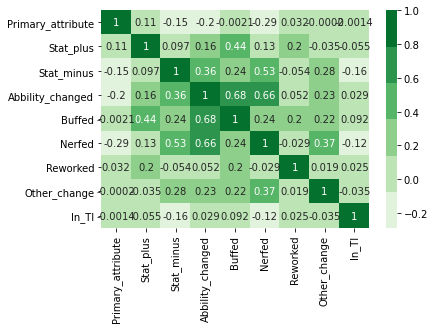

In [24]:
colormap = sns.color_palette("Greens")
sns.heatmap(rd_df.corr(), cmap=colormap, annot=True) 

From the heat map we can observe that their is no strong correlation between the columns. Except dome correlation between heroes ability change and if they are buffed or nerfed, which is logicall because such changes balance the heroes.
What interesting is that increase in stats gives fewer buff to a hero than decrease in stats gives nerf to a hero.
Although their not drastically big. 

Machine Learning:
========

As of algorithm for machine learning for this data set will be used Logistic Regression.
Because we need to predict if hero was or not in a tournament, "yes" or "no", a binary category problem.
They will be 2 models where the first one be only using the Logistic Regression on data set without any changes.
And a second with MinMaxScaler to see if it would give any better result.

The process will be similar to both with only difference is the scaler in the second model. And they are:
1.data preperation.
2.splitting into test and train.
3.applying machine learning algorithm, and scaler.
4.evaluate model.

In [30]:
rd_df.drop("Name", 1, inplace=True) #removing name column

X_Features = rd_df.columns[rd_df.columns != "In_TI"]
y_Features = "In_TI"

#first
X1 = rd_df[X_Features]
y1 = rd_df[y_Features]

#second
X2 = rd_df[X_Features]
y2 = rd_df[y_Features]

In [31]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [32]:
#first

regular_Reg_model = LogisticRegression().fit(X1_train, y1_train)

In [33]:
y1_pred = regular_Reg_model.predict(X1_test) #prediction

In [34]:
#second
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))

X2_train_scaledMM = min_max_scaler.fit_transform(X2_train)

X2_test_scaled = min_max_scaler.transform(X2_test)

In [35]:
y2_pred = regular_Reg_model.predict(X2_test_scaled) #prediction

In [36]:
print("First model Evaluation:")
print("accuracy is:",metrics.accuracy_score(y1_test, y1_pred))
print("precision is:",metrics.precision_score(y1_test, y1_pred))
print("recall is:",metrics.recall_score(y1_test, y1_pred))
print("f1 is:",metrics.f1_score(y1_test, y1_pred))

First model Evaluation:
accuracy is: 0.6666666666666666
precision is: 0.3333333333333333
recall is: 0.14285714285714285
f1 is: 0.2


In [37]:
print("Second model Evaluation:")
print("accuracy is:",metrics.accuracy_score(y2_test, y2_pred))
print("precision is:",metrics.precision_score(y2_test, y2_pred))
print("recall is:",metrics.recall_score(y2_test, y2_pred))
print("f1 is:",metrics.f1_score(y2_test, y2_pred))

Second model Evaluation:
accuracy is: 0.6666666666666666
precision is: 0.0
recall is: 0.0
f1 is: 0.0
